# Explore here

In [18]:

#! importante
#? duda
#TODO: 
#// borrar
#* esto no se pa que es 


#### Naive bayes --> independant variables --> no correlation between predictors

##### gaussian --> data is continuous (gaussian implies normal distribution --> continuous)

##### multinomial --> all variables are discrete (multinomial distribution)

##### bernoulli --> all variables are binary (1s and 0s)



In [19]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score

from pickle import dump

In [20]:

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv')
df.head(10)

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0
5,com.facebook.katana,idk i can't edit my posts? things such as my ...,0
6,com.facebook.katana,major flaws constant updates and always getti...,0
7,com.facebook.katana,video issues since i was forced into this upd...,0
8,com.facebook.katana,this update completely destroyed my facebook...,0
9,com.facebook.katana,"posting issues for the last week, there's bee...",0


get embeddings --> checkear eso en vez de knn

In [21]:
df.to_csv('../data/raw/playstore_reviews.csv', index=False)

### Starting the Project

polarity
0    584
1    307
Name: count, dtype: int64


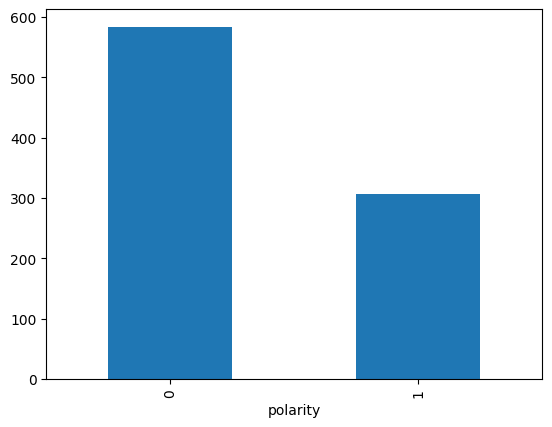

In [22]:
df['polarity'].value_counts().plot(kind='bar')
print(df['polarity'].value_counts())

In [23]:
print('Missing values:') 
print(df.isnull().sum())
print("")
print('Duplicates:')    
print(df.duplicated().sum())

print("")   
print('Unique values:')
print(df.nunique())

Missing values:
package_name    0
review          0
polarity        0
dtype: int64

Duplicates:
0

Unique values:
package_name     23
review          891
polarity          2
dtype: int64


##### Package Name

In [24]:
print(df['package_name'].value_counts())
print(df['package_name'].unique())

package_name
com.facebook.katana           40
com.evernote                  40
com.linkedin.android          40
com.king.candycrushsaga       40
com.imangi.templerun2         40
com.supercell.clashofclans    40
org.mozilla.firefox           40
com.opera.mini.native         40
com.viber.voip                40
com.facebook.orca             40
com.uc.browser.en             40
com.Slack                     40
com.dropbox.android           40
com.hamrokeyboard             39
com.whatsapp                  39
com.twitter.android           39
com.google.android.talk       39
com.tencent.mm                39
com.android.chrome            39
com.rovio.angrybirds          39
com.hamropatro                38
com.shirantech.kantipur       36
jabanaki.todo.todoly          24
Name: count, dtype: int64
['com.facebook.katana' 'com.twitter.android' 'com.linkedin.android'
 'com.king.candycrushsaga' 'com.imangi.templerun2'
 'com.supercell.clashofclans' 'com.android.chrome' 'com.tencent.mm'
 'com.viber.voi

In [28]:
df = df.drop('package_name', axis=1)
df.head()

,review,polarity
0,privacy at least put some option appear offli...,0
1,"messenger issues ever since the last update, ...",0
2,profile any time my wife or anybody has more ...,0
3,the new features suck for those of us who don...,0
4,forced reload on uploading pic on replying co...,0


In [ ]:
vec_model = CountVectorizer()